In [1]:
import pandas as pd

In [3]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [17]:
url = "https://drive.google.com/uc?id=1F3lRf32JM8ejnXq-Cbf9y7fa57zSHGz_"
df = pd.read_csv(url)

In [19]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB
None


In [21]:
print("\nUnique Values in Each Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


Unique Values in Each Column:
Company: 6 unique values
Age: 29 unique values
Salary: 40 unique values
Place: 11 unique values
Country: 1 unique values
Gender: 2 unique values


In [23]:
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
              Age       Salary      Gender
count  130.000000   124.000000  148.000000
mean    30.484615  5312.467742    0.222973
std     11.096640  2573.764683    0.417654
min      0.000000  1089.000000    0.000000
25%     22.000000  3030.000000    0.000000
50%     32.500000  5000.000000    0.000000
75%     37.750000  8000.000000    0.000000
max     54.000000  9876.000000    1.000000


In [25]:
df.rename(columns={'old_column_name': 'new_column_name'}, inplace=True)

In [31]:
df['Age'] = df['Age'].replace(0, np.nan)

In [33]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Company     8
Age        24
Salary     24
Place      14
Country     0
Gender      0
dtype: int64


In [37]:
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [41]:
df.drop_duplicates(inplace=True)

In [45]:
numeric_cols = df.select_dtypes(include=['number'])

In [47]:
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

In [49]:
outliers = ((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).sum()

In [51]:
print("\nOutliers Detected in Each Numeric Column:")
print(outliers)


Outliers Detected in Each Numeric Column:
Age        0
Salary     0
Gender    32
dtype: int64


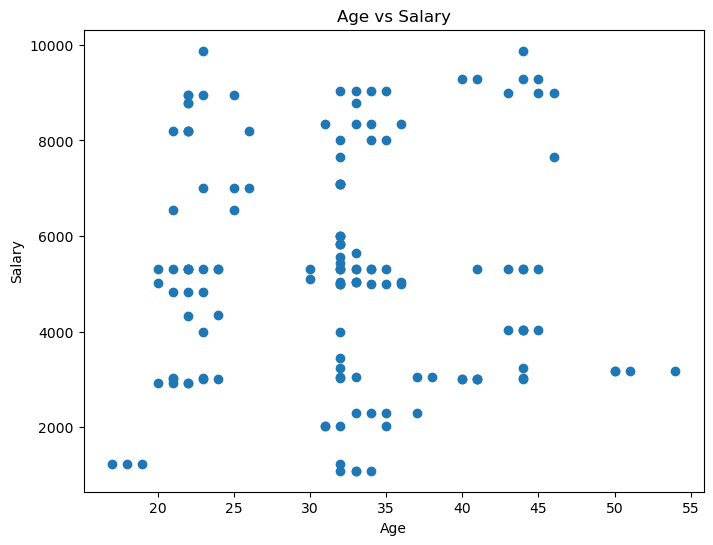

In [57]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Salary'])
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

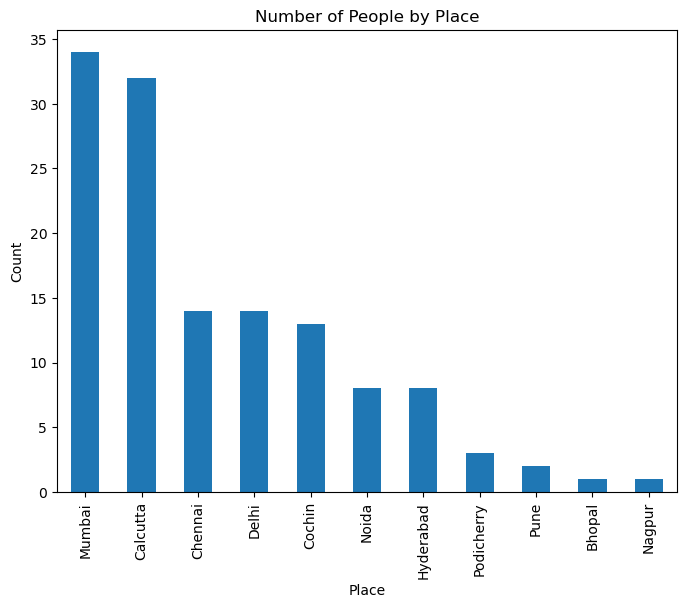

In [61]:
place_count = df['Place'].value_counts()
place_count.plot(kind='bar', figsize=(8, 6), title='Number of People by Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.show()

In [ ]:
df_encoded = pd.get_dummies(df, columns=['categorical_column'], drop_first=True)

In [69]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.select_dtypes(include=['float64', 'int64']))

In [71]:
minmax_scaler = MinMaxScaler()
normalized_features = minmax_scaler.fit_transform(df.select_dtypes(include=['float64', 'int64']))

In [73]:
scaled_df = pd.DataFrame(scaled_features, columns=df.select_dtypes(include=['float64', 'int64']).columns)
normalized_df = pd.DataFrame(normalized_features, columns=df.select_dtypes(include=['float64', 'int64']).columns)

In [75]:
print("\nScaled Data:")
print(scaled_df.head())

print("\nNormalized Data:")
print(normalized_df.head())


Scaled Data:
        Age    Salary    Gender
0 -1.465777  0.010324 -0.534522
1 -0.247168  0.010324 -0.534522
2  0.362136 -1.266072 -0.534522
3  0.971441 -0.969479 -0.534522
4 -1.100194 -0.545775 -0.534522

Normalized Data:
        Age    Salary  Gender
0  0.081081  0.480650     0.0
1  0.351351  0.480650     0.0
2  0.486486  0.137817     0.0
3  0.621622  0.217480     0.0
4  0.162162  0.331285     0.0
